In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Entire data set
X_train_all = pd.read_csv('/content/drive/MyDrive/C170MPresentationJioSandraTina/X_train.csv', header=None)
y_train = pd.read_csv('/content/drive/MyDrive/C170MPresentationJioSandraTina/y_train.csv', header=None)
X_test_all = pd.read_csv('/content/drive/MyDrive/C170MPresentationJioSandraTina/X_test.csv', header=None)
y_test = pd.read_csv('/content/drive/MyDrive/C170MPresentationJioSandraTina/y_test.csv', header=None)
X_valid_all = pd.read_csv('/content/drive/MyDrive/C170MPresentationJioSandraTina/X_valid.csv', header=None)
y_valid = pd.read_csv('/content/drive/MyDrive/C170MPresentationJioSandraTina/y_valid.csv', header=None)
print(X_train_all.shape, y_train.shape, X_test_all.shape, y_test.shape, X_valid_all.shape, y_valid.shape)

(7352, 561) (7352, 1) (1597, 561) (1597, 1) (1350, 561) (1350, 1)


In [ ]:
#Trimmed data

#Array of indices of features we are not using
features_to_delete = np.concatenate([range(6, 9), range(19, 22), range(46, 49), range(59, 62), range(86, 89), range(99, 102), range(126, 129), range(139, 142), range(166, 169), range(179, 182), range(200, 265), range(268, 277), range(290, 293), range(296, 302), range(347, 356), range(369, 372), range(375, 381), range(426, 435), range(448, 451), range(454, 460), range(502, 554)])
print(features_to_delete)
print(features_to_delete.shape)

features_final = [  9,  16,  22,  37,  38,  43,  44,  52,  54,  62,  63,  65,  66, 68,  73,  74,  75,  76,  83,  84,  89,  96, 102, 123, 129, 132, 136, 142, 159, 295, 302, 310, 314, 344, 359, 360, 381, 382, 383, 395, 403, 409, 439, 445, 451, 460, 468, 472, 560]

X_train = X_train_all.drop(X_train_all.columns[features_to_delete], axis=1)
X_test = X_test_all.drop(X_test_all.columns[features_to_delete], axis=1)
X_valid = X_valid_all.drop(X_valid_all.columns[features_to_delete], axis=1)


[  6   7   8  19  20  21  46  47  48  59  60  61  86  87  88  99 100 101
 126 127 128 139 140 141 166 167 168 179 180 181 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 268 269 270 271 272 273 274 275 276 290 291 292 296
 297 298 299 300 301 347 348 349 350 351 352 353 354 355 369 370 371 375
 376 377 378 379 380 426 427 428 429 430 431 432 433 434 448 449 450 454
 455 456 457 458 459 502 503 504 505 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532
 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550
 551 552 553]
(201,)


In [ ]:
X_train_new = X_train[features_final]
print(X_train_new.shape)
X_test_new = X_test[features_final]
X_valid_new = X_valid[features_final]

(7352, 49)


# All feature SVC and cross valid score



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVM model with the best hyperparameters found in the randomized search
clf = SVC(C=1, kernel='rbf')

# Train the model on the training set
clf.fit(X_train_all, np.ravel(y_train))

# Make predictions on the test set
y_pred = clf.predict(X_test_all)

# Compute the accuracy score of the model on the test set
score = accuracy_score(y_test, y_pred)

# Print the accuracy score of the model
print("Accuracy score:", score)


Accuracy score: 0.9492798998121478


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the SVM model with the best hyperparameters found in the randomized search
clf = SVC(C=1, kernel='rbf')

# Compute the cross-validation score of the model on the training set
scores = cross_val_score(clf, X_train_all, np.ravel(y_train), cv=5)

# Print the cross-validation score and its standard deviation
print("Cross-validation score: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))


Cross-validation score: 0.93 (+/- 0.04)


# Trimmed features and cross val score

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVM model with the best hyperparameters found in the randomized search
clf2 = SVC(C=2.83, kernel='rbf')

# Train the model on the training set
clf2.fit(X_train_new, np.ravel(y_train))

# Make predictions on the test set
y_pred = clf2.predict(X_test_new)

# Compute the accuracy score of the model on the test set
score = accuracy_score(y_test, y_pred)

# Print the accuracy score of the model
print("Accuracy score:", score)


Accuracy score: 0.9386349405134627


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize

# Define the SVM model with the best hyperparameters found in the randomized search
clf2 = SVC(C=47.59338671131486, gamma='scale', kernel='rbf')

# Compute the cross-validation score of the model on the training set
scores = cross_val_score(clf2, X_train_all, np.ravel(y_train), cv=5)

# Print the cross-validation score and its standard deviation
print("Cross-validation score: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

# Fit the model on the training set
clf2.fit(X_train_all, np.ravel(y_train))

# Make predictions on the test set
y_pred = clf2.predict(X_test_all)

# Binarize the test labels and predicted labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_train))

# Compute the F1 score for each class
f1_scores = f1_score(y_test_bin, y_pred_bin, average=None)

# Print the F1 score for each class
for i in range(len(class_labels)):
    print(f"F1 score for {class_labels[i+1]}: {f1_scores[i]:.2f}")


Cross-validation score: 0.95 (+/- 0.04)
F1 score for WALKING: 0.98
F1 score for WALKING_UPSTAIRS: 0.96
F1 score for WALKING_DOWNSTAIRS: 0.97
F1 score for SITTING: 0.92
F1 score for STANDING: 0.94
F1 score for LAYING: 1.00


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize

# Define the SVM model with the new hyperparameters
clf2 = SVC(C=0.06330913375500483, gamma='scale', kernel='linear')

# Compute the cross-validation score of the model on the training set
scores = cross_val_score(clf2, X_train_all, np.ravel(y_train), cv=5)

# Print the cross-validation score and its standard deviation
print("Cross-validation score: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

# Fit the model on the training set
clf2.fit(X_train_all, np.ravel(y_train))

# Make predictions on the test set
y_pred = clf2.predict(X_test_all)

# Binarize the test labels and predicted labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_train))

# Compute the F1 score for each class
f1_scores = f1_score(y_test_bin, y_pred_bin, average=None)

# Print the F1 score for each class
for i in range(len(class_labels)):
    print(f"F1 score for {class_labels[i+1]}: {f1_scores[i]:.2f}")


Cross-validation score: 0.94 (+/- 0.05)
F1 score for WALKING: 0.98
F1 score for WALKING_UPSTAIRS: 0.97
F1 score for WALKING_DOWNSTAIRS: 0.97
F1 score for SITTING: 0.91
F1 score for STANDING: 0.92
F1 score for LAYING: 1.00


# Searching for SVC hyperparameters


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define the SVC model
clf = SVC()

# Define the hyperparameter space
param_dist = {'C': loguniform(1e-4, 1e4),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# Define the randomized search
rs = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# Train the model on the training set
rs.fit(X_train_new, y_train)

# Print the best hyperparameters found by the randomized search
print("Best hyperparameters:", rs.best_params_)

# Make predictions on the test set using the best model
best_clf = rs.best_estimator_
y_pred = best_clf.predict(X_test_new)

# Compute the accuracy score of the model on the test set
score = accuracy_score(y_test, y_pred)

# Print the accuracy score of the model
print("Accuracy score:", score)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters: {'C': 0.06330913375500483, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy score: 0.9248591108328115


# Plotting ROC for all classes and single class

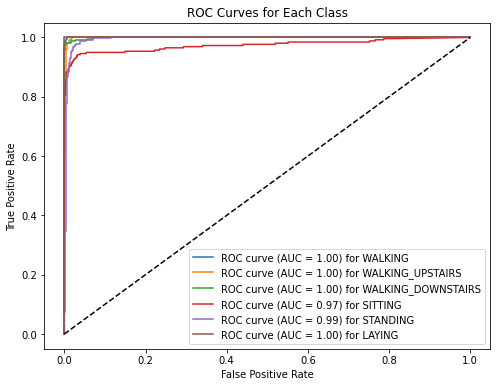

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
class_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Define the SVC model with the specified hyperparameters
clf = OneVsRestClassifier(SVC(C=47.59338671131486, gamma='scale', kernel='rbf', probability=True))

# Train the model on the training set
clf.fit(X_train_all, y_train_bin)

# Make predictions on the test set
y_prob = clf.predict_proba(X_test_all)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for {class_labels[i+1]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


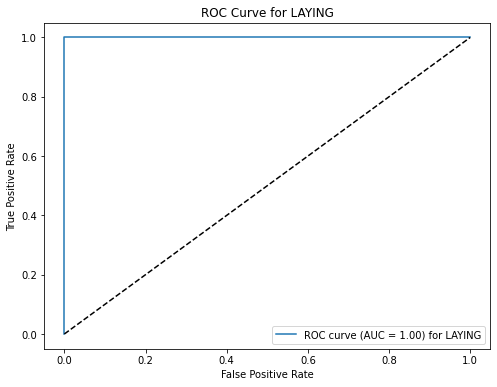

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
class_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Define the SVC model with the specified hyperparameters
clf = OneVsRestClassifier(SVC(C=47.59338671131486, gamma='scale', kernel='rbf', probability=True))

# Train the model on the training set
clf.fit(X_train_all, y_train_bin)

# Make predictions on the test set
y_prob = clf.predict_proba(X_test_all)

# Compute the ROC curve and AUC for class 6
fpr, tpr, _ = roc_curve(y_test_bin[:, 5], y_prob[:, 5])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for class 6
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}) for {class_labels[6]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {class_labels[6]}')
plt.legend(loc="lower right")
plt.show()


# ROC curve



# Ensemble model

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

(7352, 49) (7352, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


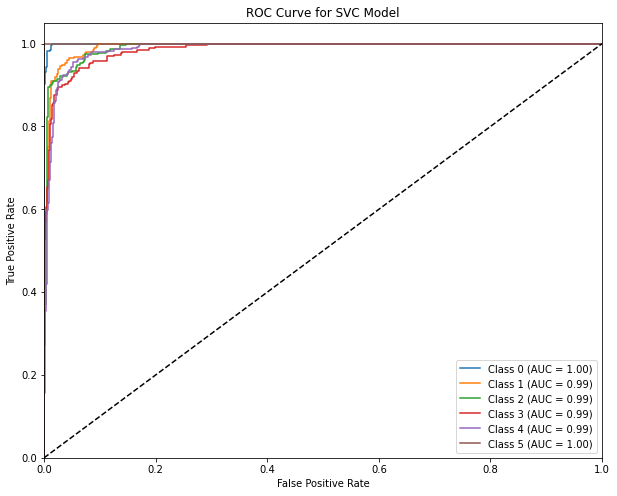

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

print(X_train_new.shape, y_train.shape)
# Fit the SVC model
clf = SVC(C=1, kernel='rbf')
clf.fit(X_train_new, y_train)

# Transform labels to binary format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)

# Compute probabilities for each class
y_scores = clf.decision_function(X_test_new)

# Compute ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC Model')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

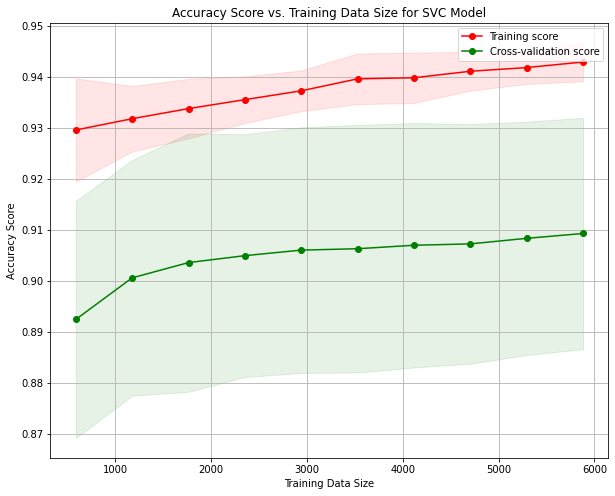

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC

# Define the SVC model
clf = SVC(C=1, kernel='rbf')

# Define the label binarizer
lb = LabelBinarizer()

# Define the sizes of the training set to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_new, y_train, cv=5, train_sizes=train_sizes,
    scoring='accuracy', shuffle=True, random_state=42)

# Compute the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 8))
plt.title("Accuracy Score vs. Training Data Size for SVC Model")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

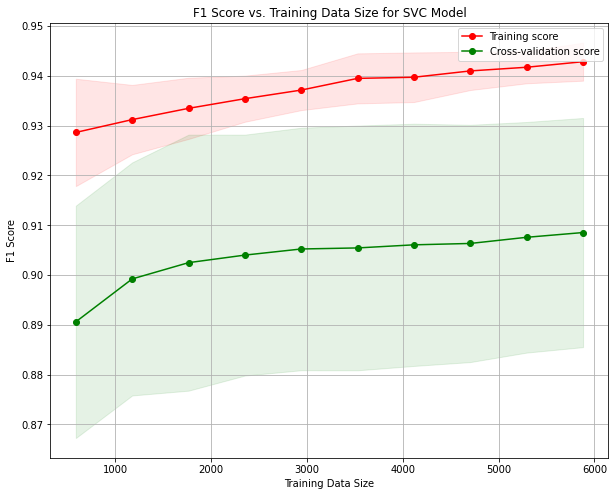

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Define the SVC model
clf = SVC(C=1, kernel='rbf')

# Define the label binarizer
lb = LabelBinarizer()

# Define the sizes of the training set to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve with F1 score as the metric
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_new, y_train, cv=5, train_sizes=train_sizes,
    scoring='f1_weighted', shuffle=True, random_state=42)

# Compute the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 8))
plt.title("F1 Score vs. Training Data Size for SVC Model")
plt.xlabel("Training Data Size")
plt.ylabel("F1 Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()


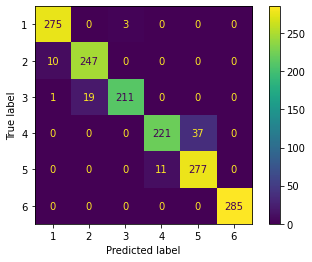

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot()


Confusion matrix for unoptimzed data


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


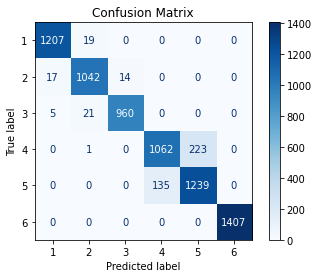

Accuracy score: 0.9408324265505985


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

# Assuming you have x_train_new, y_train defined already

# Create a generic SVC model
svc_model = SVC()

# Train the model on the training data
svc_model.fit(X_train_new, y_train)

# Predict on the training data to plot the confusion matrix
y_train_pred = svc_model.predict(X_train_new)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_train, y_train_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
plot_confusion_matrix(svc_model, X_train_new, y_train, ax=ax, cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show()

print(f"Accuracy score: {accuracy}")


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


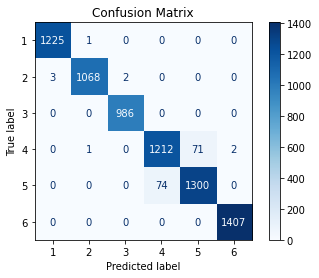

Accuracy score: 0.9790533188248096


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Assuming you have X_train_new, y_train defined already

# Create a generic SVC model
svc_model = SVC()

# Train the model on the training data
svc_model.fit(X_train_all, y_train)

# Predict on the training data to plot the confusion matrix
y_train_pred = svc_model.predict(X_train_all)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_train, y_train_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy score: {accuracy}")
